<a href="https://colab.research.google.com/github/MOHAK7488/PUBG-ANALYSIS/blob/master/PUBG1_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
train = pd.read_csv('train_V2.csv')
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0.0,0.0,60.0,1241.0,0.0,0.0,0.00,1306.0,squad-fpp,28.0,26.0,-1.0,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0.0,0.0,57.0,0.0,0.0,0.0,0.00,1777.0,squad-fpp,26.0,25.0,1484.0,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0.0,0.0,47.0,0.0,0.0,0.0,0.00,1318.0,duo,50.0,47.0,1491.0,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0.0,0.0,75.0,0.0,0.0,0.0,0.00,1436.0,squad-fpp,31.0,30.0,1408.0,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0.0,0.0,45.0,0.0,1.0,1.0,58.53,1424.0,solo-fpp,97.0,95.0,1560.0,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [17]:
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
176733,020d699f1c3351,df6f0b7ad56ff2,baccb86e0e6890,0,1,0.0,0,0.0,0.0,67.0,1328.0,0.0,0.0,0.00,1461.0,squad,29.0,29.0,-1.0,0.0,1008.0,0.0,0.0,0.0,0.0,993.4,4.0,1523.0,0.3929
176734,f5177c7973f05f,02cd5eef974817,6600062cd33735,3,2,372.6,2,0.0,4.0,4.0,1904.0,4.0,2.0,141.30,1852.0,squad-fpp,30.0,28.0,-1.0,0.0,8038.0,0.0,0.0,0.0,0.0,1898.0,3.0,1949.0,1.0000
176735,566d378cc5ca7f,70e2eb436252a3,1bc239fec0e4ad,0,2,200.0,0,0.0,4.0,17.0,0.0,2.0,1.0,26.49,1411.0,solo-fpp,95.0,94.0,1604.0,0.0,0.0,0.0,0.0,0.0,0.0,809.9,5.0,0.0,0.6809
176736,b612f5e8d4ebc1,2b71984d7ee04f,3c6be5f0192e46,0,0,0.0,0,0.0,0.0,62.0,1010.0,0.0,0.0,0.00,1974.0,squad,32.0,30.0,-1.0,0.0,912.7,0.0,0.0,0.0,0.0,1144.0,6.0,1508.0,0.3871
176737,674904075339d2,6244cacd859f1a,20a7c1f501fec5,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176738 entries, 0 to 176737
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               176738 non-null  object 
 1   groupId          176738 non-null  object 
 2   matchId          176738 non-null  object 
 3   assists          176738 non-null  int64  
 4   boosts           176738 non-null  int64  
 5   damageDealt      176738 non-null  float64
 6   DBNOs            176738 non-null  int64  
 7   headshotKills    176737 non-null  float64
 8   heals            176737 non-null  float64
 9   killPlace        176737 non-null  float64
 10  killPoints       176737 non-null  float64
 11  kills            176737 non-null  float64
 12  killStreaks      176737 non-null  float64
 13  longestKill      176737 non-null  float64
 14  matchDuration    176737 non-null  float64
 15  matchType        176737 non-null  object 
 16  maxPlace         176737 non-null  floa

In [19]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,176738.000000,176738.000000,176738.000000,176738.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000,176737.000000
mean,0.233294,1.112573,130.625437,0.655332,0.225595,1.370143,47.659177,505.896609,0.923864,0.542954,22.813399,1579.138205,44.510335,43.019481,890.587076,0.163192,602.066602,0.003683,4.559095,0.023634,0.007508,1156.128353,3.671048,608.014451,0.472863
std,0.592080,1.722028,171.492322,1.148266,0.598458,2.671909,27.466040,627.240447,1.561194,0.712306,50.523213,258.752488,23.864917,23.327526,737.144027,0.466267,1482.396959,0.076880,30.447818,0.165319,0.089795,1183.946218,2.462425,739.994751,0.307478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,209.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1367.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.000000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,83.850000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,1438.000000,30.000000,30.000000,1443.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,690.500000,3.000000,0.000000,0.459000
75%,0.000000,2.000000,185.300000,1.000000,0.000000,2.000000,71.000000,1171.000000,1.000000,1.000000,21.080000,1851.000000,49.000000,47.000000,1500.000000,0.000000,0.064100,0.000000,0.000000,0.000000,0.000000,1978.000000,5.000000,1495.000000,0.740700
max,21.000000,21.000000,5479.000000,32.000000,40.000000,52.000000,100.000000,2152.000000,48.000000,14.000000,981.400000,2237.000000,100.000000,100.000000,5580.000000,16.000000,28450.000000,6.000000,1441.000000,4.000000,4.000000,13530.000000,71.000000,1972.000000,1.000000


In [0]:
missing_data = train.isna().sum().to_frame()
missing_data.columns=["Missing data"]

In [21]:
no_matches = train.loc[:,"matchId"].nunique()
print("There are {} matches registered in our database.".format(no_matches))

There are 46489 matches registered in our database.


In [22]:
m_types = train.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,69934
1,duo-fpp,39704
2,squad,24948
3,solo-fpp,21395
4,duo,12140
5,solo,7243
6,normal-squad-fpp,677
7,crashfpp,241
8,normal-duo-fpp,205
9,flaretpp,92


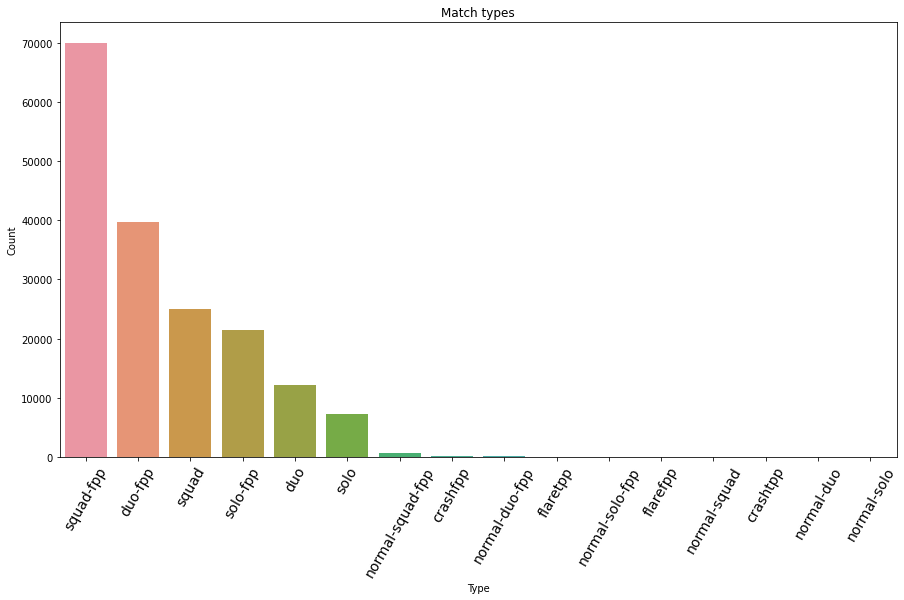

In [23]:
plt.figure(figsize=(15,8))
ticks = m_types.Type.values
ax = sns.barplot(x="Type", y="Count", data=m_types)
ax.set_xticklabels(ticks, rotation=60, fontsize=14)
ax.set_title("Match types")
plt.show()

In [24]:
m_types2 = train.loc[:,"matchType"].value_counts().to_frame()
aggregated_squads = m_types2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
aggregated_duos = m_types2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
aggregated_solo = m_types2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
aggregated_mt = pd.DataFrame([aggregated_squads,aggregated_duos,aggregated_solo], index=["squad","duo","solo"], columns =["count"])
aggregated_mt

,count
squad,95581
duo,52058
solo,28717


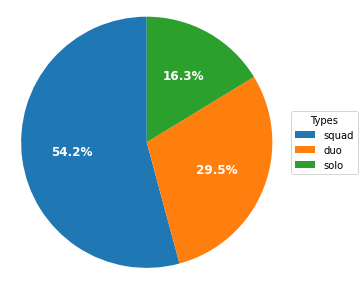

In [25]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['squad', 'duo', 'solo']

wedges, texts, autotexts = ax1.pie(aggregated_mt["count"],textprops=dict(color="w"), autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
ax1.legend(wedges, labels,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.show()


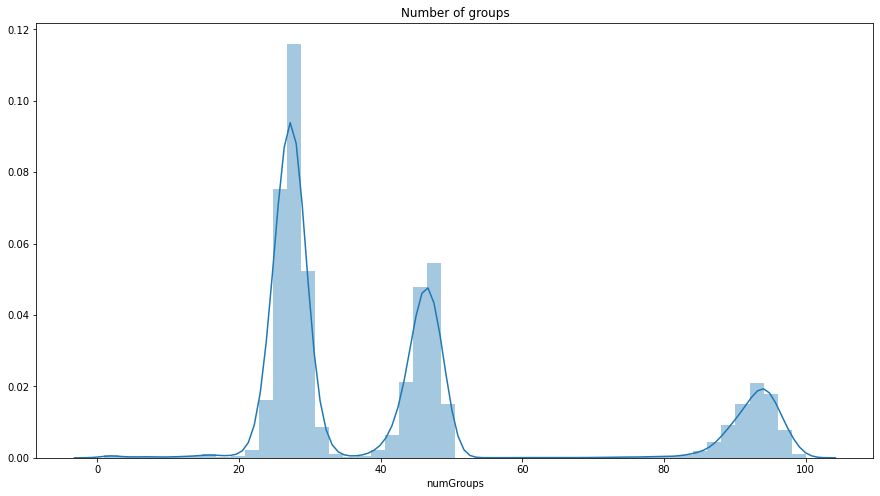

In [26]:
plt.figure(figsize=(15,8))
ax = sns.distplot(train["numGroups"])
ax.set_title("Number of groups")
plt.show()

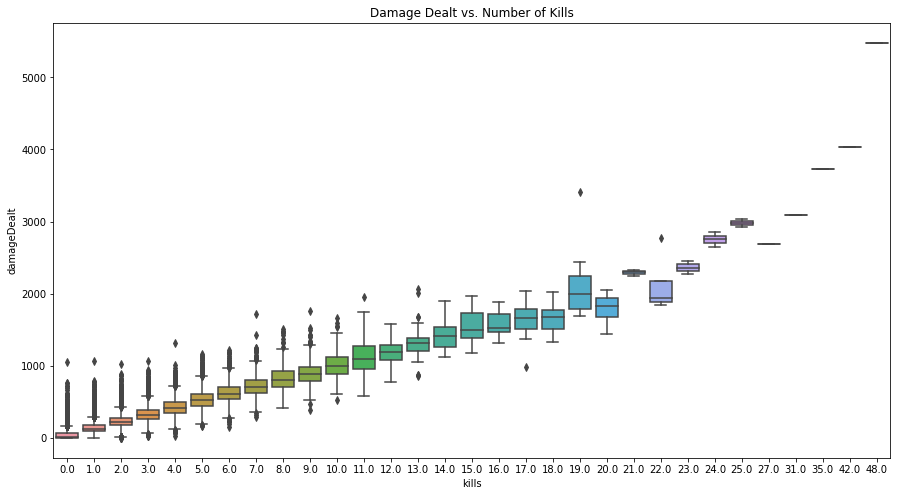

In [27]:
plt.figure(figsize=(15,8))
ax1 = sns.boxplot(x="kills",y="damageDealt", data = train)
ax1.set_title("Damage Dealt vs. Number of Kills")
plt.show()

In [28]:
train[train['kills']>60][["Id","assists","damageDealt","headshotKills","kills","longestKill"]]

,Id,assists,damageDealt,headshotKills,kills,longestKill


Maximum number of headshots that the player scored: 40.0


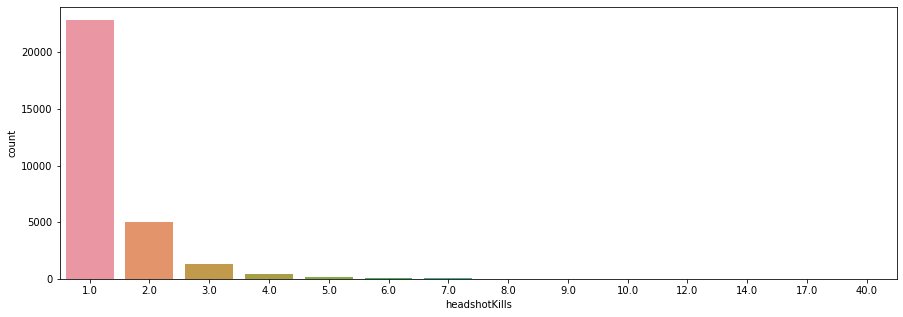

In [29]:
headshots = train[train['headshotKills']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['headshotKills'].sort_values())
print("Maximum number of headshots that the player scored: " + str(train["headshotKills"].max()))

Mean number of DBNOs that the player scored: 0.6553316208172549


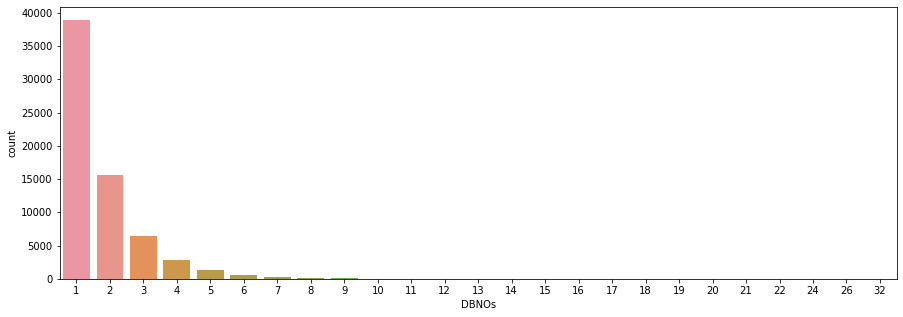

In [30]:
headshots = train[train['DBNOs']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['DBNOs'].sort_values())
print("Mean number of DBNOs that the player scored: " + str(train["DBNOs"].mean()))

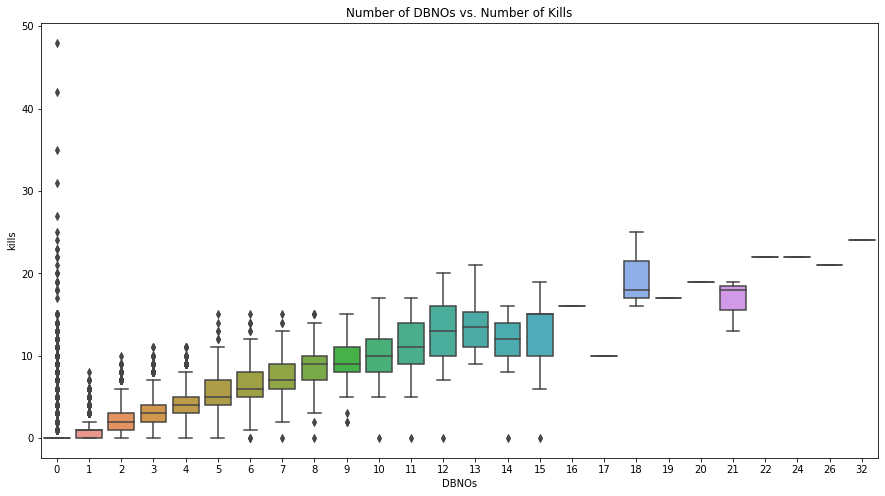

In [31]:
plt.figure(figsize=(15,8))
ax2 = sns.boxplot(x="DBNOs",y="kills", data = train)
ax2.set_title("Number of DBNOs vs. Number of Kills")
plt.show()

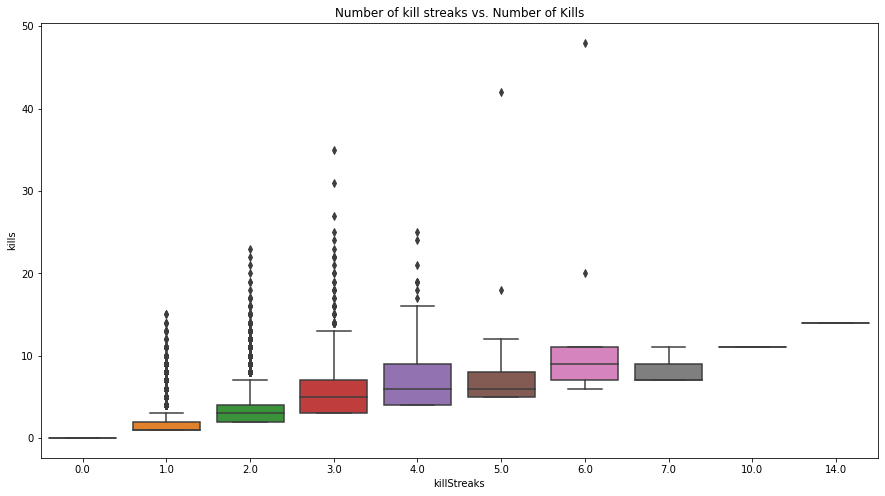

In [32]:
plt.figure(figsize=(15,8))
ax3 = sns.boxplot(x="killStreaks",y="kills", data = train)
ax3.set_title("Number of kill streaks vs. Number of Kills")
plt.show()

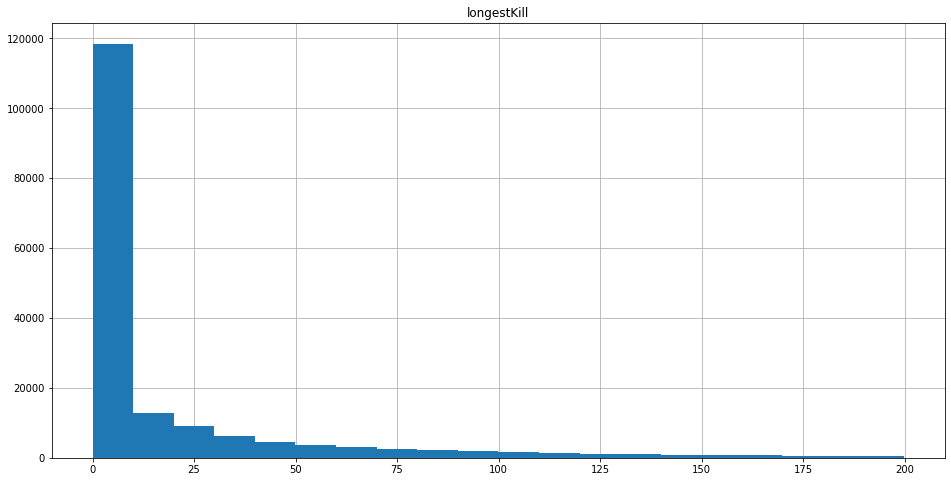

In [33]:
dist = train[train['longestKill']<200]
plt.rcParams['axes.axisbelow'] = True
dist.hist('longestKill', bins=20, figsize = (16,8))
plt.show()

In [34]:
print("Average longest kill distance a player achieve is {:.1f}m, 95% of them not more than {:.1f}m and a maximum distance is {:.1f}m." .format(train['longestKill'].mean(),train['longestKill'].quantile(0.95),train['longestKill'].max()))

Average longest kill distance a player achieve is 22.8m, 95% of them not more than 125.8m and a maximum distance is 981.4m.


In [0]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

train.dropna(subset=["winPlacePerc"], inplace=True) # droping rows with missing labels

X = train.drop(["Id","groupId","matchId","matchType","winPlacePerc"], axis=1)
y = train["winPlacePerc"]

col_names = X.columns

transformer = Normalizer().fit(X)
X = transformer.transform(X)


In [0]:
X = pd.DataFrame(X, columns=col_names)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [0]:
param = {
    'eta': 0.15, 
    'max_depth': 5,  
    'num_class': 2} 

steps = 2  # The number of training iterations
model = xgb.train(param, D_train, steps)

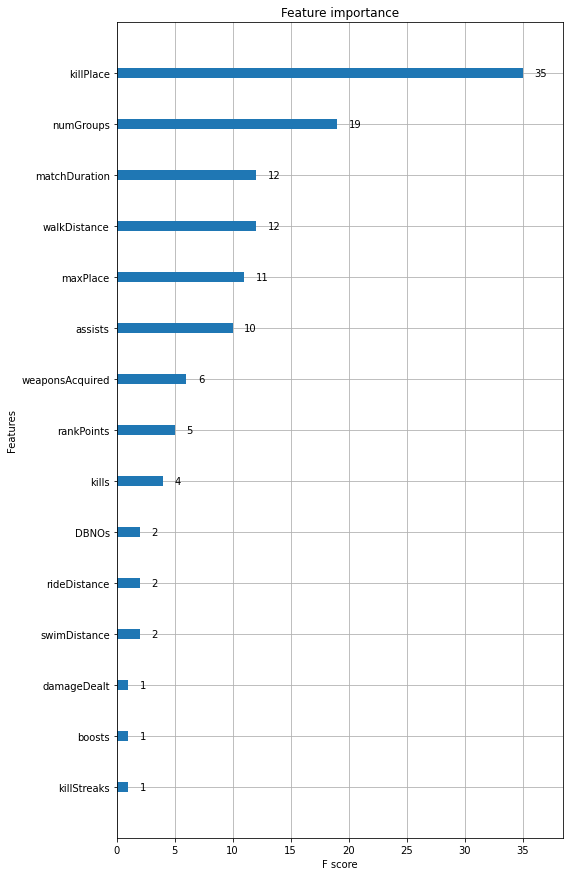

In [39]:
fig, ax1 = plt.subplots(figsize=(8,15))
xgb.plot_importance(model, ax=ax1)
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("MSE = {}".format(mean_squared_error(Y_test, best_preds)))

MSE = 0.31834315380955075
